# Importing Data and Librarires 

In [132]:
# Import the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [133]:
# Load the dataset as a DataFrame
amazon_sale = pd.read_csv(r"C:\Users\USER\Downloads\archive\Amazon Sale Report.csv")
amazon_sale.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [134]:
# Check the shape of the datasets
amazon_sale.shape

(128975, 24)

In [135]:
# Check the data types of the datasets
amazon_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [136]:
# Check the statistical summary of the datasets
amazon_sale.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


# Data Cleaning

In [137]:
# Check the missing data in the dataset
amazon_sale.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [138]:
# Drop some unnecessary columns
amazon_sale.drop(['index','Unnamed: 22','currency'],axis=1,inplace=True)

In [139]:
# Check for duplicates
amazon_sale.duplicated().sum()

6

In [140]:
# Drop duplicates
amazon_sale.drop_duplicates(inplace=True)

In [141]:
# Check for missing values
amazon_sale.isnull().sum()

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
Amount                 7792
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49150
B2B                       0
fulfilled-by          89692
dtype: int64

In [142]:
# Check the columns with missing values
amazon_sale[['Courier Status', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids', 'fulfilled-by']].head()

,Courier Status,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,fulfilled-by
0,NaN,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,Easy Ship
1,Shipped,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,Easy Ship
2,Shipped,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,NaN
3,NaN,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,Easy Ship
4,Shipped,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,NaN


In [143]:
# Fill the missing values in Courier Status Column
amazon_sale['Courier Status'].fillna('Unknown', inplace=True)

In [144]:
# Check the value count of the column
amazon_sale['Courier Status'].value_counts()

Shipped      109484
Unknown        6872
Unshipped      6681
Cancelled      5932
Name: Courier Status, dtype: int64

In [145]:
# Check for the missing values in Amount Column
amazon_sale[amazon_sale['Amount'].isnull()].head(3)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
8,407-5443024-5233168,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,SET200,SET200-KR-NP-A-XXXL,Set,3XL,...,Cancelled,0,NaN,HYDERABAD,TELANGANA,500008.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN
29,404-5933402-8801952,04-30-22,Cancelled,Merchant,Amazon.in,Standard,JNE2132,JNE2132-KR-398-XXXL,kurta,3XL,...,Unknown,0,NaN,GUWAHATI,ASSAM,781003.0,IN,NaN,False,Easy Ship
65,171-4137548-0481151,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,JNE3373,JNE3373-KR-XXL,kurta,XXL,...,Cancelled,0,NaN,Dahod,Gujarat,389151.0,IN,NaN,False,NaN


In [146]:
# Fill the missing values in Amount Column
amazon_sale['Amount'].fillna(0, inplace=True)

In [147]:
# Check for the missing values in ship-city
amazon_sale[amazon_sale['ship-city'].isnull()].head(3)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
1871,404-0566904-4825137,04-29-22,Shipped,Amazon,Amazon.in,Expedited,J0301,J0301-TP-L,Top,L,...,Shipped,1,493.0,NaN,NaN,NaN,NaN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN
1872,404-0566904-4825137,04-29-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-L,kurta,L,...,Shipped,1,458.0,NaN,NaN,NaN,NaN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN
8752,406-4003386-8768363,04-25-22,Shipped,Amazon,Amazon.in,Expedited,JNE3376,JNE3376-KR-M,kurta,M,...,Shipped,1,432.0,NaN,NaN,NaN,NaN,NaN,False,NaN


In [148]:
# Fill the missing values in the ship-city etc column
amazon_sale['ship-city'].fillna('Unknown', inplace=True)
amazon_sale['ship-state'].fillna('Unknown', inplace=True)
amazon_sale['ship-postal-code'].fillna('Unknown', inplace=True)
amazon_sale['ship-country'].fillna('Unknown', inplace=True)

In [149]:
# Fill the missing values in the promotion-ids column
amazon_sale['promotion-ids'].fillna('No Promotion_id', inplace=True)

In [150]:
# Fill the missing values in the fulfilled-by column
amazon_sale['fulfilled-by'].fillna('Unknown', inplace=True)

In [151]:
# Check for missing values in amazon_sale
amazon_sale.isnull().sum()

Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
promotion-ids         0
B2B                   0
fulfilled-by          0
dtype: int64

In [152]:
# Convert date column to datetime format
amazon_sale['Date'] = pd.to_datetime(amazon_sale['Date'])

In [153]:
# A glimpse of the DataFrame
amazon_sale.head(3)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,Unknown,0,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,No Promotion_id,False,Easy Ship
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,Unknown


# Data Exploration

In [154]:
# A preview of the DataFrame column
amazon_sale.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'Amount', 'ship-city', 'ship-state',
       'ship-postal-code', 'ship-country', 'promotion-ids', 'B2B',
       'fulfilled-by'],
      dtype='object')

In [155]:
# Unique values in Sales Channel Column
amazon_sale['Sales Channel '].unique()

array(['Amazon.in', 'Non-Amazon'], dtype=object)

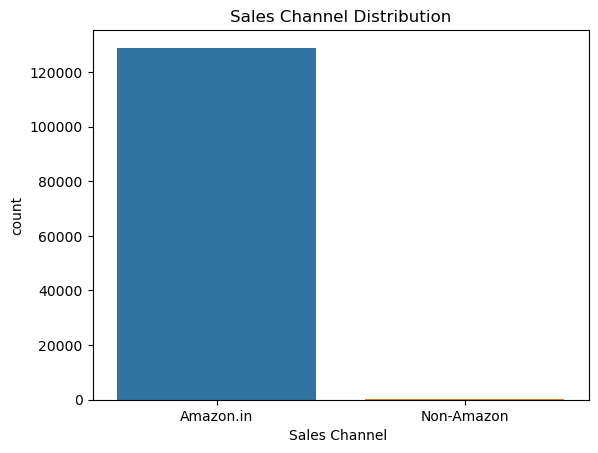

In [156]:
# Bar chart of Sales Channel Column
sns.countplot(data=amazon_sale, x='Sales Channel ')
plt.title('Sales Channel Distribution')
plt.show()

In [157]:
# Unique values in Fulfilment Column
amazon_sale['Fulfilment'].unique()

array(['Merchant', 'Amazon'], dtype=object)

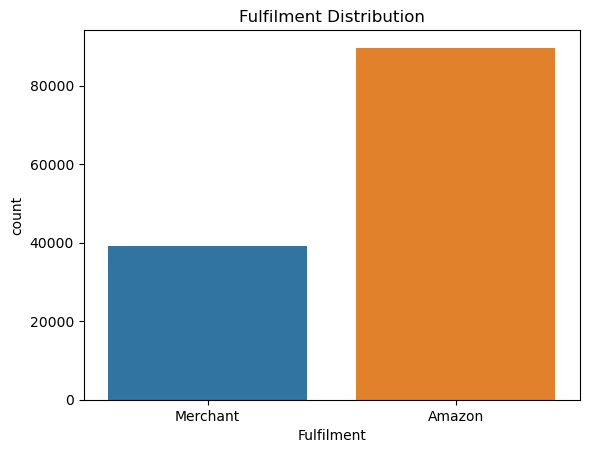

In [158]:
# Bar chart of Fulfilment Column
sns.countplot(data=amazon_sale, x='Fulfilment')
plt.title('Fulfilment Distribution')
plt.show()

In [159]:
# Unique values in Payment Category Column
amazon_sale['Category'].unique()

array(['Set', 'kurta', 'Western Dress', 'Top', 'Ethnic Dress', 'Bottom',
       'Saree', 'Blouse', 'Dupatta'], dtype=object)

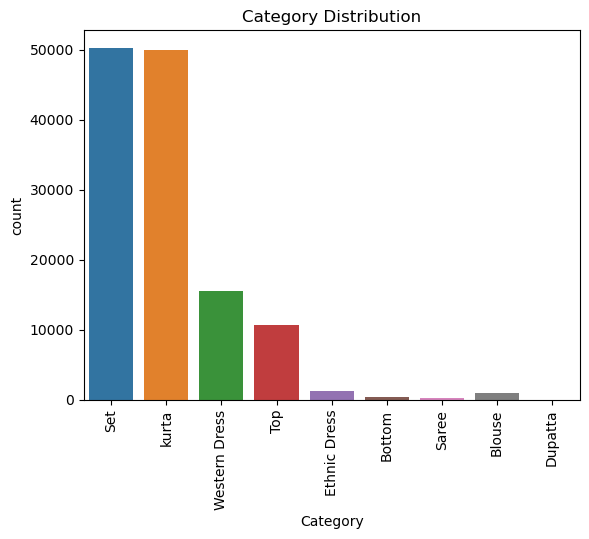

In [160]:
# Bar chart of Category Column
sns.countplot(data=amazon_sale, x='Category')
plt.title('Category Distribution')
plt.xticks(rotation=90)
plt.show()

In [161]:
# Unique values in the Size column
amazon_sale['Size'].unique()

array(['S', '3XL', 'XL', 'L', 'XXL', 'XS', '6XL', 'M', '4XL', '5XL',
       'Free'], dtype=object)

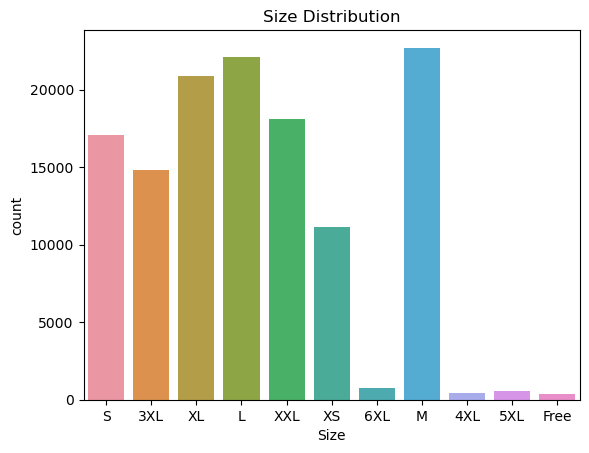

In [162]:
# Bar chart of Size Column
sns.countplot(data=amazon_sale, x='Size')
plt.title('Size Distribution')
plt.show()

In [163]:
# Unique values in the ship-city column
amazon_sale['ship-city'].unique()

array(['MUMBAI', 'BENGALURU', 'NAVI MUMBAI', ...,
       'GULABPURA, Distt BHILWARA', 'Prayagraj (ALLAHABAD)', 'Halol'],
      dtype=object)

In [164]:
# Value Count of Ship-Country Column
amazon_sale['ship-country'].value_counts()

IN         128936
Unknown        33
Name: ship-country, dtype: int64

In [165]:
# Value Count of B2B Column
amazon_sale['B2B'].value_counts()

False    128098
True        871
Name: B2B, dtype: int64

In [166]:
# Month with the highest Sales
amazon_sale['Month'] = amazon_sale['Date'].dt.strftime('%B')
amazon_sale.groupby('Month')['Amount'].sum()

Month
April    28838708.32
June     23424646.38
March      101683.85
May      26225004.75
Name: Amount, dtype: float64

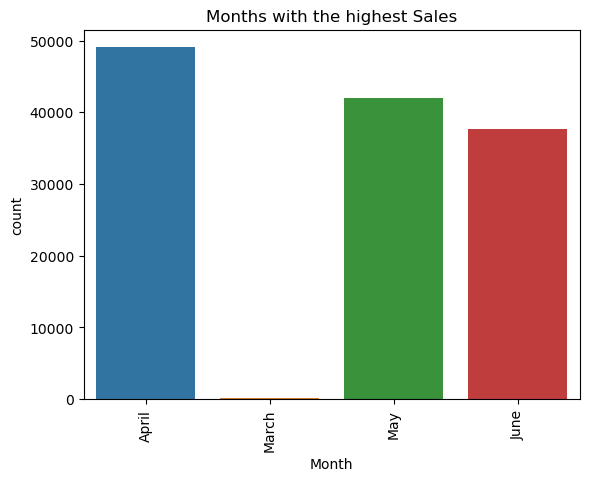

In [171]:
# Bar chart of the Months with the highest Sales
amazon_sale['Amount'].sort_values(ascending=False)
sns.countplot(data=amazon_sale, x='Month')
plt.title('Months with the highest Sales')
plt.xticks(rotation=90)
plt.show()

In [168]:
# Year with the highest Sales
amazon_sale['Year'] = amazon_sale['Date'].dt.year
amazon_sale.groupby('Year')['Amount'].sum()

Year
2022    78590043.3
Name: Amount, dtype: float64